In [31]:
import pandas as pd
customers = pd.read_csv("../data/external/customers.csv")

customers.head()

,shopUserId,invoiceFirstName,invoiceLastName,invoiceSSN,invoiceZip,invoiceCity,invoiceCountryId
0,812427,Annie,Rønde Rasmussen,NaN,8400,Ebeltoft,58
1,831360,Bodil,Bisserup,1704652220,8660,Skanderborg,58
2,209204,Anna Kristina,Berg,temp,29437,Sölvesborg,205
3,831340,Berit,Olsen,NaN,2337,Tangen,160
4,230625,Mats Sten-Åke,Johnsson,195612184019,11727,Stockholm,205


In [32]:
# Display all information for shopUserId 80792
display(customers[customers['shopUserId'] == 80792])


,shopUserId,invoiceFirstName,invoiceLastName,invoiceSSN,invoiceZip,invoiceCity,invoiceCountryId
73886,80792,Briitta,Saarela,040249-078B,84100,Ylivieska,72


In [33]:

missing_props = customers.isnull().mean()
print(missing_props)

shopUserId          0.000000
invoiceFirstName    0.000000
invoiceLastName     0.000000
invoiceSSN          0.359829
invoiceZip          0.000000
invoiceCity         0.000000
invoiceCountryId    0.000000
dtype: float64


In [34]:
#count all rows
print(len(customers))

74049


In [35]:
# Display all unique values of invoiceSSN and their occurrence in an expandable output
import IPython.display as ipd

# Get the value counts as a string
value_counts_str = customers['invoiceSSN'].value_counts(dropna=False).to_string()

# Display in an expandable HTML details block
ipd.display(ipd.HTML(f"<details><summary>Show invoiceSSN value counts</summary><pre>{value_counts_str}</pre></details>"))


In [36]:
# Display all rows where invoiceSSN is '141052-138Y'
from IPython.display import display
display(customers[customers['invoiceSSN'] == '15044437403'])


,shopUserId,invoiceFirstName,invoiceLastName,invoiceSSN,invoiceZip,invoiceCity,invoiceCountryId
2724,812880,Else Marie,Monsen,15044437403,2760,Brandbu,160
10813,758448,Else Marie,Monsen,15044437403,2760,Brandbu,160
14073,742757,Else Marie,Monsen,15044437403,2760,Brandbu,160
15035,739610,Else Marie,Monsen,15044437403,2760,Brandbu,160
32541,630646,Else Marie,Monsen,15044437403,2760,Brandbu,160
47947,458194,Else Marie,Monsen,15044437403,2760,Brandbu,160
53339,410369,Else Marie,Monsen,15044437403,2760,Brandbu,160
64859,333261,Else Marie,Monsen,15044437403,2760,Brandbu,160
67208,308458,Else Marie,Monsen,15044437403,2760,Brandbu,160
68231,296247,Else Marie,Monsen,15044437403,2760,Brandbu,160


In [37]:
mask = customers['invoiceSSN'].notna() & (customers['invoiceSSN'] != 'temp')
agg = {col: 'first' for col in ['shopUserId', 'invoiceFirstName', 'invoiceLastName', 'invoiceZip', 'invoiceCity', 'invoiceCountryId']}
canonical = customers[mask].groupby('invoiceSSN', as_index=False).agg(agg)
customers = pd.concat([canonical, customers[~mask]], ignore_index=True)

In [38]:
print(len(customers))

62256


In [39]:
# Display the first few customers sorted by invoiceLastName in ascending order
from IPython.display import display, HTML

def expandable_display(df, n=100, sort_col='invoiceLastName', ascending=False):
    """
    Display the first n rows of the DataFrame sorted by sort_col in an expandable HTML element.
    """
    sorted_df = df.sort_values(sort_col, ascending=ascending).head(n)
    html = f"""
    <details>
      <summary>Show top {n} customers sorted by {sort_col} ({'desc' if not ascending else 'asc'})</summary>
      {sorted_df.to_html(index=True)}
    </details>
    """
    display(HTML(html))

expandable_display(customers, n=100, sort_col='invoiceLastName', ascending=False)

,invoiceSSN,shopUserId,invoiceFirstName,invoiceLastName,invoiceZip,invoiceCity,invoiceCountryId
5641,14074437444,730904,kari,øverby,3535,Krøderen,160
45529,NaN,496698,inger margrethe,ørum,8000,Aarhus C,58
34881,NaN,806471,liv kirsten,ølmheim,6993,Høyanger,160
32012,2909422127,532593,ove,øllegård,8420,Knebel,58
2873,07104441267,405870,astrid,øigård,8206,Fauske,160
27710,198304034880,674859,Funda,özabus,41675,göteborg,205
32527,310149-0247,735762,Thua,öhman,13100,Hämeenlinna,72
37794,NaN,758995,margareta,öbrink,80428,Gävle,205
46883,NaN,613247,stig,öberg,82962,Gnarp,205
19013,194805036664,726122,gunnel,århammar,71593,Odensbacken,205


In [40]:
customers.head()

,invoiceSSN,shopUserId,invoiceFirstName,invoiceLastName,invoiceZip,invoiceCity,invoiceCountryId
0,193205159340,352262,Toini,Johansson,46331,Lilla Edet,205
1,193409141623,655759,Ingegerd Elisabet,Gustafsson,63355,Eskilstuna,205
2,193806152629,295478,Sonja,Rossler,56160,Tenhult,205
3,194002161406,749139,Inger,Roos,75755,Uppsala,205
4,194104202983,712041,Britt,Håkansson,38897,Halltorp,205


In [41]:
# Check for missing values in each column of the customers DataFrame,
# and also check for the presence of the string 'temp' in any column
missing_values = customers.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Check for the word 'temp' in any cell of the DataFrame
temp_mask = customers.apply(lambda col: col.astype(str).str.contains('temp', na=False)).any(axis=1)
num_temp_rows = temp_mask.sum()
print(f"Number of rows containing the word 'temp': {num_temp_rows}")
if num_temp_rows > 0:
    print("Rows with 'temp' present:")
    print(customers[temp_mask])


Missing values per column:
invoiceSSN          26645
shopUserId              0
invoiceFirstName        0
invoiceLastName         0
invoiceZip              0
invoiceCity             0
invoiceCountryId        0
dtype: int64
Number of rows containing the word 'temp': 2191
Rows with 'temp' present:
      invoiceSSN  shopUserId invoiceFirstName invoiceLastName invoiceZip  \
33426       temp      209204    Anna Kristina            Berg      29437   
33429       temp      206302      LONE HANSEN          hansen       6990   
33430       temp      141445            Mirja        Virtanen      04600   
33433       temp      142839             Gyri            Ryen       3360   
33443       temp      142442     Britt-Louise       Fallenius      26354   
...          ...         ...              ...             ...        ...   
62061       temp      215026             Mari          Mosand       7052   
62213        NaN       79556             temp            User       temp   
62224        NaN    

In [42]:
#drop invoiceFirstName invoiceLastName invoiceZip invoiceCity
customers = customers.drop(columns=['invoiceFirstName', 'invoiceLastName'])

In [43]:
from IPython.display import display, HTML

def show_expandable_dataframe(df, n=100, title="Show DataFrame"):
    html = f"""
    <details>
      <summary style="font-size:16px; cursor:pointer;">{title} (first {n} rows)</summary>
      {df.head(n).to_html()}
    </details>
    """
    display(HTML(html))

show_expandable_dataframe(customers, n=100, title="Customers Data Preview")

,invoiceSSN,shopUserId,invoiceZip,invoiceCity,invoiceCountryId
0,193205159340,352262,46331,Lilla Edet,205
1,193409141623,655759,63355,Eskilstuna,205
2,193806152629,295478,56160,Tenhult,205
3,194002161406,749139,75755,Uppsala,205
4,194104202983,712041,38897,Halltorp,205
5,196204271974,774376,24297,Hörby,205
6,01013048270,774440,6440,Elnesvågen,160
7,010134-500B,386559,79700,Heinävesi,72
8,010136-050B,803056,00150,Helsinki,72
9,01014038236,290265,3403,Lier,160


In [44]:
# Check the data types of each column in the customers DataFrame
print("Column data types in customers DataFrame:")
print(customers.dtypes)


Column data types in customers DataFrame:
invoiceSSN          object
shopUserId           int64
invoiceZip          object
invoiceCity         object
invoiceCountryId     int64
dtype: object


In [45]:
#get unique values in invoicessn
print(customers['invoiceSSN'].unique())

[' 193205159340' ' 193409141623' ' 193806152629' ... '9404182322 ' nan
 'temp']


In [46]:
import re
from datetime import date

country_map = {58: "DK", 160: "NO", 205: "SE", 72: "FI"}

def _safe_date(y, m, d):
    try:
        return date(int(y), int(m), int(d))
    except Exception:
        return None

def _age_from_birthdate(born):
    if not born:
        return None
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

def _parse_birthdate(ssn_str, country):
    if pd.isna(ssn_str):
        return None
    digits = re.sub(r'\D', '', str(ssn_str))

    if country == 'SE':
        if len(digits) >= 12:  # YYYYMMDDxxxx
            return _safe_date(digits[:4], digits[4:6], digits[6:8])
        elif len(digits) >= 10:  # YYMMDDxxxx
            yy, mm, dd = int(digits[:2]), digits[2:4], digits[4:6]
            sep = '-' if '-' in str(ssn_str) else '+' if '+' in str(ssn_str) else None
            this_year = date.today().year
            if sep == '+':  # 100+ years old
                y = 1900 + yy if (1900 + yy) <= this_year - 100 else 1800 + yy
            else:
                y = 1900 + yy if (1900 + yy) > this_year - 100 else 2000 + yy
            return _safe_date(y, mm, dd)
        return None

    if country == 'NO' and len(digits) == 11:
        dd, mm, yy = int(digits[0:2]), int(digits[2:4]), int(digits[4:6])
        individ = int(digits[6:9])
        if dd > 40:  # D-number adjustment
            dd -= 40
        if 0 <= individ <= 499:
            year = 1900 + yy
        elif 500 <= individ <= 749 and 54 <= yy <= 99:
            year = 1800 + yy
        elif 500 <= individ <= 999 and 0 <= yy <= 39:
            year = 2000 + yy
        elif 900 <= individ <= 999 and 40 <= yy <= 99:
            year = 1900 + yy
        else:
            year = (2000 + yy) if yy <= 24 else (1900 + yy)
        return _safe_date(year, mm, dd)

    if country == 'DK' and len(digits) >= 10:
        dd, mm, yy = digits[0:2], digits[2:4], int(digits[4:6])
        year = (2000 + yy) if yy <= 24 else (1900 + yy)
        return _safe_date(year, mm, dd)

    if country == 'FI':
        m = re.match(r'^(\d{2})(\d{2})(\d{2})([-+A])(\d{3})\w?$', str(ssn_str).strip(), re.I)
        if m:
            dd, mm, yy, cent = int(m.group(1)), int(m.group(2)), int(m.group(3)), m.group(4).upper()
            base = {'+': 1800, '-': 1900, 'A': 2000}[cent]
            return _safe_date(base + yy, mm, dd)
        if len(digits) >= 10:  # Old numeric-only fallback
            dd, mm, yy = int(digits[0:2]), int(digits[2:4]), int(digits[4:6])
            year = (2000 + yy) if yy <= 24 else (1900 + yy)
            return _safe_date(year, mm, dd)
        return None

    return None

def get_gender_age_from_ssn(ssn, country_id):
    if pd.isna(ssn):
        return None, None

    ssn_str = str(ssn).strip()
    country = country_map.get(country_id)
    if not country:
        return None, None

    digits = re.sub(r'\D', '', ssn_str)
    gender_digit = None
    if country == 'SE' and len(digits) >= 10:
        gender_digit = int(digits[-4:][2])
    elif country == 'NO' and len(digits) == 11:
        gender_digit = int(digits[8])
    elif country == 'DK' and len(digits) >= 10:
        gender_digit = int(digits[-1])
    elif country == 'FI':
        m = re.match(r'^\d{6}[-+A]\d{3}\w?$', ssn_str, re.I)
        if m:
            individual = re.split('[-+A]', ssn_str)[1]
            if len(individual) >= 3 and individual[2].isdigit():
                gender_digit = int(individual[2])
        elif len(digits) >= 10:
            gender_digit = int(digits[8])

    gender = None
    if gender_digit is not None:
        gender = 'Male' if gender_digit % 2 else 'Female'
    age = _age_from_birthdate(_parse_birthdate(ssn_str, country))
    return gender, age

# Apply to DataFrame
customers[['Gender', 'Age']] = customers.apply(
    lambda r: pd.Series(get_gender_age_from_ssn(r['invoiceSSN'], r['invoiceCountryId'])),
    axis=1
)


In [47]:
from IPython.display import display, HTML

def show_expandable_dataframe(df, n=100, title="Show DataFrame"):
    html = f"""
    <details>
      <summary style="font-size:16px; cursor:pointer;">{title} (first {n} rows)</summary>
      {df.head(n).to_html()}
    </details>
    """
    display(HTML(html))

show_expandable_dataframe(customers, n=100, title="Customers Data Preview")

,invoiceSSN,shopUserId,invoiceZip,invoiceCity,invoiceCountryId,Gender,Age
0,193205159340,352262,46331,Lilla Edet,205,Female,93.0
1,193409141623,655759,63355,Eskilstuna,205,Female,90.0
2,193806152629,295478,56160,Tenhult,205,Female,87.0
3,194002161406,749139,75755,Uppsala,205,Female,85.0
4,194104202983,712041,38897,Halltorp,205,Female,84.0
5,196204271974,774376,24297,Hörby,205,Male,63.0
6,01013048270,774440,6440,Elnesvågen,160,Female,95.0
7,010134-500B,386559,79700,Heinävesi,72,Female,91.0
8,010136-050B,803056,00150,Helsinki,72,Female,89.0
9,01014038236,290265,3403,Lier,160,Female,85.0


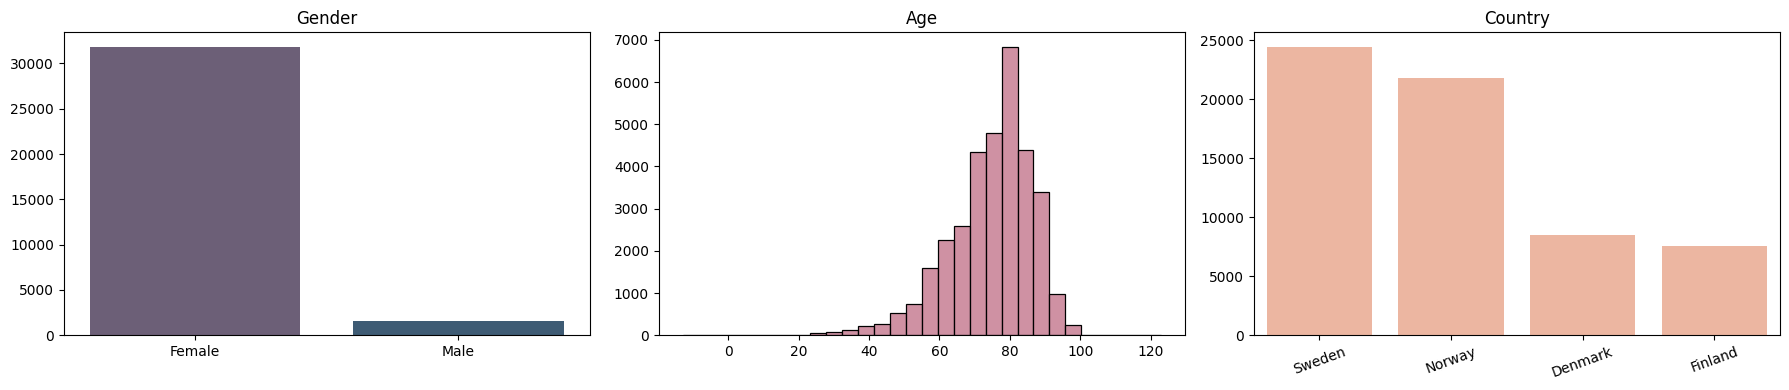

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

country_map = {58: 'Denmark', 205: 'Sweden', 160: 'Norway', 72: 'Finland'}
customers['Country'] = customers['invoiceCountryId'].map(country_map).fillna(customers['invoiceCountryId'])

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Fix for FutureWarning: assign palette via hue and set legend=False
sns.countplot(x='Gender', hue='Gender', data=customers, palette=['#6C5B7B', '#355C7D'], ax=axes[0], legend=False)
axes[0].set(title='Gender', xlabel='', ylabel='')

sns.histplot(customers['Age'].dropna().astype(float), bins=30, color='#C06C84', ax=axes[1])
axes[1].set(title='Age', xlabel='', ylabel='')

sns.countplot(x='Country', data=customers, order=customers['Country'].value_counts().index, color='#F8B195', ax=axes[2])
axes[2].set(title='Country', xlabel='', ylabel='')
axes[2].tick_params(axis='x', labelrotation=20)

plt.tight_layout()
plt.show()

In [49]:
customers.astype(str).to_csv('../data/processed/customers_clean.csv', index=False)

In [50]:
customers.isna().mean()



invoiceSSN          0.427991
shopUserId          0.000000
invoiceZip          0.000000
invoiceCity         0.000000
invoiceCountryId    0.000000
Gender              0.463104
Age                 0.463104
Country             0.000000
dtype: float64